In [2]:
import sys
import pandas as pd
import numpy as np
from pandas import read_excel, DataFrame, pivot_table, melt, crosstab
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
origin = read_excel('MusinsaSampleData_age.xlsx')
origin

,상품명,종류,분류,성별,조회수,누적판매,선호연령,선호연령비율_x,선호성별,남자선호비율,...,상품가격,제품소재,색상,선호연령비율_y,~18세,19~23세,24~28세,29~33세,34~39세,40세~
0,와이드 데님 팬츠 [그레이],바지,데님 팬츠,"남성, 여성",144000,8500,"23세 이하,","['~18세42,19~23세21,24~28세12,29~33세7,34~39세4,40세...",남성,0.75,...,21200.0,COTTON 100%,"BLACK, GRAY, RAW DENIM, MEDIUM BLUE","[42, 21, 12, 7, 4, 14]",42.0,21.0,12.0,7.0,4.0,14.0
1,1992 오버핏 스웨트셔츠 화이트멜란지,상의,맨투맨/스웨트셔츠,NaN,1400,163,0,"['~18세49,19~23세3,24~28세6,29~33세10,34~39세9,40세~...",NaN,0.49,...,36900.0,상세페이지 참조,상세페이지 참조,"[49, 3, 6, 10, 9, 23]",49.0,3.0,6.0,10.0,9.0,23.0
2,핸드볼 스페지알 - 핑크 / IF6561,스니커즈,패션스니커즈화,"남성, 여성",79000,1600,"24 33세,","['~18세18,19~23세16,24~28세24,29~33세18,34~39세11,4...",여성,0.34,...,139000.0,상품 Tag 참고,핑크,"[18, 16, 24, 18, 11, 13]",18.0,16.0,24.0,18.0,11.0,13.0
3,베이직 푸퍼_SPJPE11C11,아우터,숏패딩/숏헤비 아우터,남성,608000,75000,"19 28세,","['~18세57,19~23세14,24~28세10,29~33세6,34~39세4,40세...",남성,0.73,...,62910.0,겉감 폴리에스터100%안감 폴리에스터100%,"(10)WHITE,(15)GRAY,(16)LIGHT GRAY,(19)BLACK,(3...","[57, 14, 10, 6, 4, 9]",57.0,14.0,10.0,6.0,4.0,9.0
4,워셔블 아란 케이블 후드 집업 니트 (IVORY),상의,니트/스웨터,"남성, 여성",186000,4600,"19 28세,","['~18세24,19~23세27,24~28세23,29~33세10,34~39세5,40...",여성,0.36,...,39900.0,Acryl 80%Nylon 20%,아이보리,"[24, 27, 23, 10, 5, 11]",24.0,27.0,23.0,10.0,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,남성드레스셔츠 네이비 솔리드 슬림핏 1THTHA4MSU105,상의,셔츠/블라우스,NaN,40,0,0,['~18세19~23세24~28세29~33세34~39세40세~'],NaN,0.92,...,35000.0,"폴리에스터 45%, 면 55%",파란색,[],NaN,NaN,NaN,NaN,NaN,NaN
7658,컬러 블록 후드 블랙,상의,후드 티셔츠,NaN,314,0,0,"['~18세21,19~23세20,24~28세6,29~33세18,34~39세9,40세...",NaN,0.40,...,31000.0,상품 상세설명 참조,블랙,"[21, 20, 6, 18, 9, 26]",21.0,20.0,6.0,18.0,9.0,26.0
7659,X 버클캡 [그린],모자,캡/야구 모자,공용,700,150,"29 39세,","['~18세26,19~23세11,24~28세11,29~33세17,34~39세13,4...",남성,0.62,...,35100.0,상세페이지 참조,Cotton 100%,"[26, 11, 11, 17, 13, 22]",26.0,11.0,11.0,17.0,13.0,22.0
7660,X 버클캡 [베이지],모자,캡/야구 모자,공용,900,200,"24 33세,","['~18세38,19~23세13,24~28세14,29~33세16,34~39세10,4...",남성,0.50,...,35100.0,상세페이지 참조,Cotton 100%,"[38, 13, 14, 16, 10, 9]",38.0,13.0,14.0,16.0,10.0,9.0


In [5]:
total_df = origin.filter(['종류','분류','누적판매'],axis=1)

total_df

,종류,분류,누적판매
0,바지,데님 팬츠,8500
1,상의,맨투맨/스웨트셔츠,163
2,스니커즈,패션스니커즈화,1600
3,아우터,숏패딩/숏헤비 아우터,75000
4,상의,니트/스웨터,4600
...,...,...,...
7657,상의,셔츠/블라우스,0
7658,상의,후드 티셔츠,0
7659,모자,캡/야구 모자,150
7660,모자,캡/야구 모자,200


In [20]:
grouped_df= total_df.groupby(['종류', '분류']).sum()
grouped_df.sort_values(by = '누적판매', ascending = False, inplace=True)

category_df= total_df.groupby(['종류']).sum()
category_df.sort_values(by = '누적판매', ascending= False, inplace=True) 

category_df

,분류,누적판매
종류,,
상의,맨투맨/스웨트셔츠니트/스웨터반소매 티셔츠니트/스웨터후드 티셔츠니트/스웨터후드 티셔츠...,106847762
아우터,숏패딩/숏헤비 아우터겨울 싱글 코트겨울 싱글 코트블루종/MA-1숏패딩/숏헤비 아우터...,49267011
바지,데님 팬츠트레이닝/조거 팬츠데님 팬츠트레이닝/조거 팬츠데님 팬츠슈트 팬츠/슬랙스슈트...,47483491
스포츠/용품,스포츠가방캠핑용품아우터스포츠가방아우터캠핑용품캠핑용품아우터아우터하의상의하의아우터아우터...,31348019
모자,캡/야구 모자캡/야구 모자캡/야구 모자캡/야구 모자비니캡/야구 모자캡/야구 모자캡/...,21875061
가방,백팩백팩메신저/크로스 백백팩백팩캐리어백팩토트백캐리어메신저/크로스 백백팩백팩메신저/크...,17866863
뷰티,향수/탈취스킨케어미용 소품뷰티 디바이스베이스 메이크업스킨케어포인트 메이크업베이스 메...,11381799
액세서리,머플러벨트벨트벨트머플러머플러장갑머플러머플러벨트키링/키케이스머플러키링/키케이스머플러장...,9987709
여성 가방,숄더백숄더백숄더백숄더백토트백백팩크로스백크로스백크로스백토트백숄더백토트백숄더백숄더백크로...,8176188


In [71]:
total_df2 = total_df.sort_values(['종류'])
tops = total_df2[total_df2['종류'] == '상의']
tops1 = tops.groupby(["분류"]).sum()
tops1 = tops1.sort_values('누적판매', ascending = False)
tops1

# bags = bags[bags['누적판매'] != 0]
# bags.sort_values('누적판매')

,종류,누적판매
분류,,
니트/스웨터,상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의...,33782280
맨투맨/스웨트셔츠,상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의...,22504553
후드 티셔츠,상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의...,21253040
셔츠/블라우스,상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의...,9314432
긴소매 티셔츠,상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의...,7821825
반소매 티셔츠,상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의...,6099430
기타 상의,상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의...,3520244
피케/카라 티셔츠,상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의,1517758
민소매 티셔츠,상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의상의...,1034200


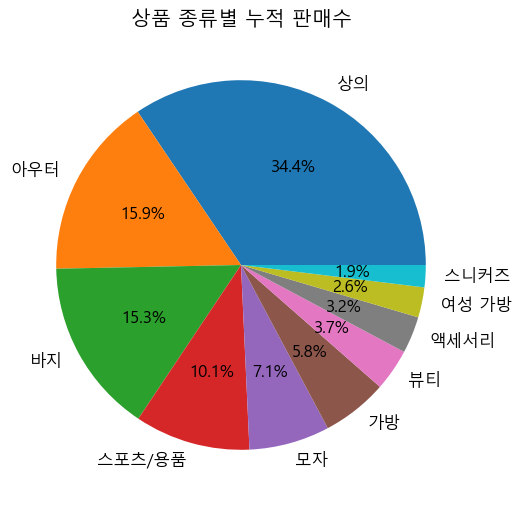

In [73]:
head_df = category_df.head(10)
plt.figure()
plt.title("상품 종류별 누적 판매수")
plt.pie(head_df['누적판매'], labels=head_df.index, autopct='%0.1f%%')
plt.show()
plt.close()

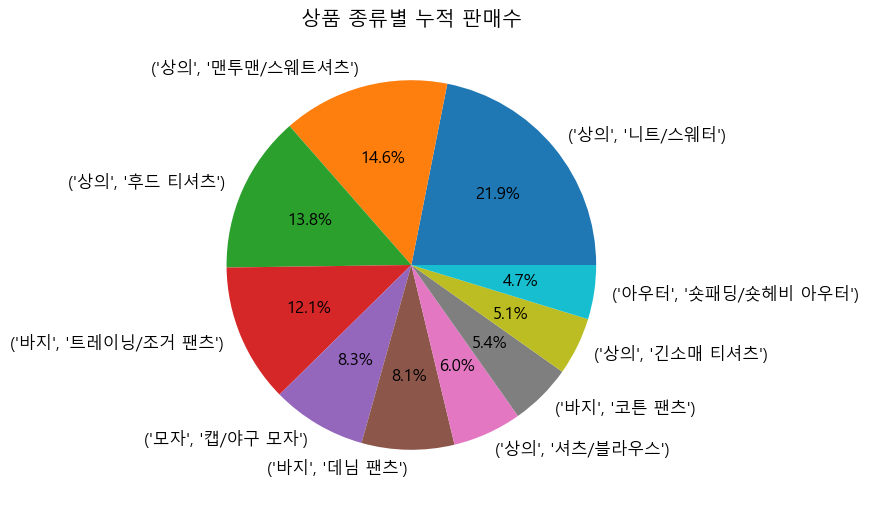

In [8]:
head_df = grouped_df.head(10)
plt.figure()
plt.title("상품 종류별 누적 판매수")
plt.pie(head_df['누적판매'], labels=head_df.index, autopct='%0.1f%%')
plt.show()
plt.close()

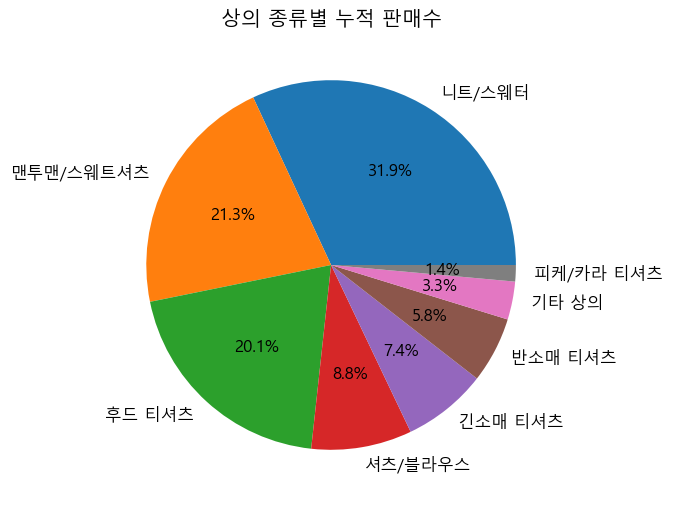

In [74]:
head_df = tops1.head(8)
plt.figure()
plt.title("상의 종류별 누적 판매수")
plt.pie(head_df['누적판매'], labels=head_df.index, autopct='%0.1f%%')
plt.show()
plt.close()